In [1]:
# ## Ejecutar antes de comenzar para cargar la carpeta con el archivo de audio

# !git clone https://github.com/jmmarinr/FisExperimental3.git   

In [2]:
# @title Librerias

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.io import wavfile
from IPython.display import Audio

**IMPORTANTE**: Solo un estudiante del grupo debe adjuntar el notebook en el Classroom con el código y el desarrollo de cada numeral. No olvide incluir el nombre de los estudiantes


*   Nombre 1: Estiven Castrillon
*   Nombre 2: Sofía Moscoso
*   Nombre 3: Ana María Hurtado
*   Nombre 4: Sebastián Duque

# Tarea 1







A continuación, se adjunta un archivo de audio en formato .wav correspondiente a la grabación de una nota musical proveniente de un piano. Tomando como base este archivo de audio, realice lo siguiente:


In [3]:
Audio('D:/Estiven/Datos/Proyectos/fisica_experimental_lab/Experimental Physics III/FisExperimental3/Tarea1/archivo_audio_tarea1.wav')

## Punto 1

Grafique la señal en función del tiempo. Imprima la frecuencia de muestreo y el número de muestras.



Frecuencia de muestreo = 11025 Hz
Número de muestras = 11250


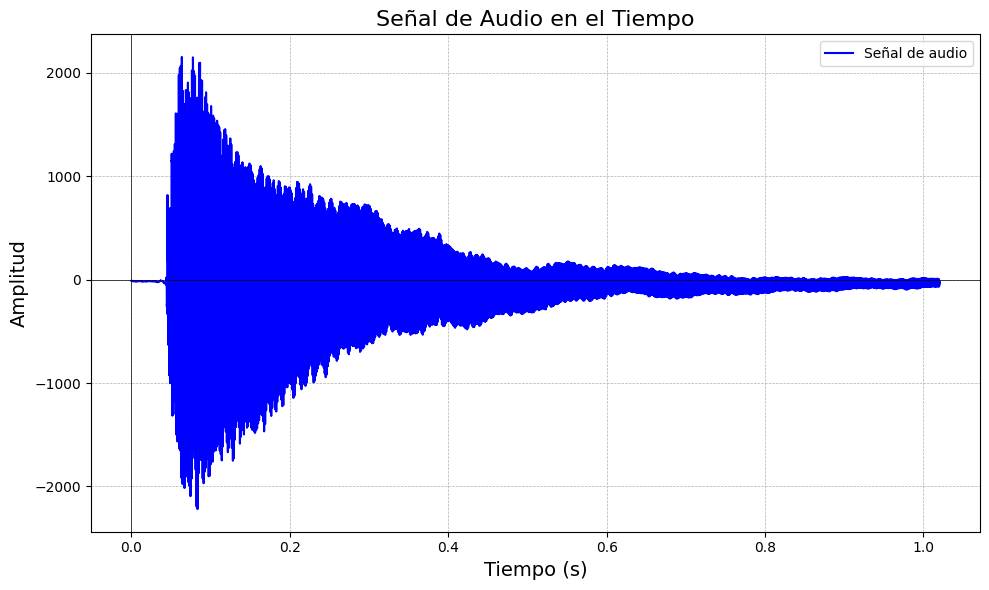

In [4]:
# Leyendo el archivo con la función wavfile.read
audio_path = 'D:/Estiven/Datos/Proyectos/fisica_experimental_lab/Experimental Physics III/FisExperimental3/Tarea1/archivo_audio_tarea1.wav'
frecuencia_de_muestreo, data = wavfile.read(audio_path)

# Frecuencia de muestreo y número de muestras
print('Frecuencia de muestreo =', frecuencia_de_muestreo, 'Hz')
print('Número de muestras =', len(data))

# Gráfica de la señal de audio
t_inicial, t_final = 0, len(data) / frecuencia_de_muestreo # len(data) / frecuencia_de_muestreo = duración del audio en segundos, (recordar que 1/s^-1 = s)
t = np.linspace(t_inicial, t_final, len(data)) # Vector de tiempo en segundos

plt.figure(figsize=(10, 6))
plt.plot(t, data, label='Señal de audio', color='b', linewidth=1.5)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.title('Señal de Audio en el Tiempo', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Punto 2

Calcule la transformada de Fourier y realice un código para identificar y hacer una lista con la frecuencia fundamental y las secundarias $^1$. Grafique la magnitud de la transformada en función de la frecuencia y superponga los puntos correspondientes a los máximos.



$^1$ Puede emplear la librería <code> find_peaks </code> de <code >scipy.signal </code>.

Frecuencia fundamental: 784.0 Hz
Frecuencias secundarias mayores a la frecuencia dominante, (solamente positivas): [1571.92, 2367.68, 3175.2, 3998.4, 4833.36]


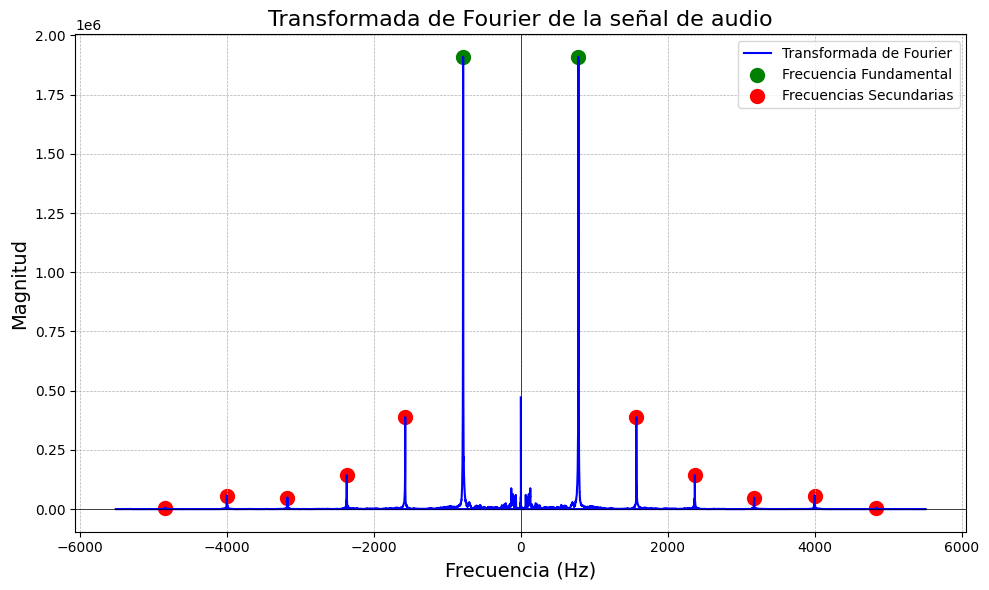

In [5]:
# Calculando la transformada de Fourier de data
transformada_de_fourier = np.fft.fft(data)
frecuencias = np.fft.fftfreq(len(data), 1 / frecuencia_de_muestreo) # Frecuencias en Hz

# Encontrando la frecuencia fundamental
frecuencia_fundamental = frecuencias[np.argmax(np.abs(transformada_de_fourier))] # La frecuencia fundamental será la frecuencia con mayor magnitud en la transformada de Fourier
print(f"Frecuencia fundamental: {frecuencia_fundamental} Hz")

magnitud = np.abs(transformada_de_fourier) # Magnitud de la transformada de Fourier
indices_de_picos, propiedades_indices_de_picos = find_peaks(magnitud, height=5000, distance=500) # Encontrando los picos de la transformada de Fourier
# Los anteriores parámetros height y distance se ajustaron manualmente para obtener los picos deseados, los multiplos de la frecuencia fundamental

# Filtrando los picos para obtener solo aquellos mayores a la frecuencia fundamental
frecuencias_de_picos = frecuencias[indices_de_picos]
magnitudes_de_picos = magnitud[indices_de_picos]
indices_de_picos_mayores = [i for i, f in enumerate(frecuencias_de_picos) if np.abs(f) > np.abs(frecuencia_fundamental)] # Indices de los picos mayores a la frecuencia fundamental

# Calculando las frecuencias secundarias, estas serán las frecuencias con magnitud mayor a la frecuencia fundamental
frecuencias_secundarias_mayores = frecuencias_de_picos[indices_de_picos_mayores] 
magnitudes_secundarias_mayores = magnitudes_de_picos[indices_de_picos_mayores]
print(f"Frecuencias secundarias mayores a la frecuencia dominante, (solamente positivas): {sorted(set(abs(frecuencias_secundarias_mayores)))}")

# Gráfica de la transformada de Fourier y los puntos máximos con la función find_peaks de scipy
plt.figure(figsize=(10, 6))

# Gráfica del espacio de las frecuencias y sus magnitudes, (transformada de Fourier)
plt.plot(frecuencias, magnitud, label='Transformada de Fourier', color='b', linewidth=1.5)

#Gráficas de las frecuencias fundamentales y secundarias
plt.scatter(frecuencia_fundamental, magnitud[np.argmax(magnitud)], color='g', s=100, label='Frecuencia Fundamental')
plt.scatter(-frecuencia_fundamental, magnitud[np.argmax(magnitud)], color='g', s=100)
plt.scatter(frecuencias_secundarias_mayores, magnitudes_secundarias_mayores, color='r', s=100, label='Frecuencias Secundarias')

plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('Magnitud', fontsize=14)
plt.title('Transformada de Fourier de la señal de audio', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5) # Líneas para diferencias el eje x y el eje y
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Punto 3

Con base en la ecuación $f_N =440 Hz \times 2^{\frac{N}{12}}$ , con $f_N$ la frecuencia de la nota $N$ y siendo $N=0$ la nota La4, identifique el nombre de la nota musical presente en la grabación.

N = 10.000201567086583
f_N = 784.0


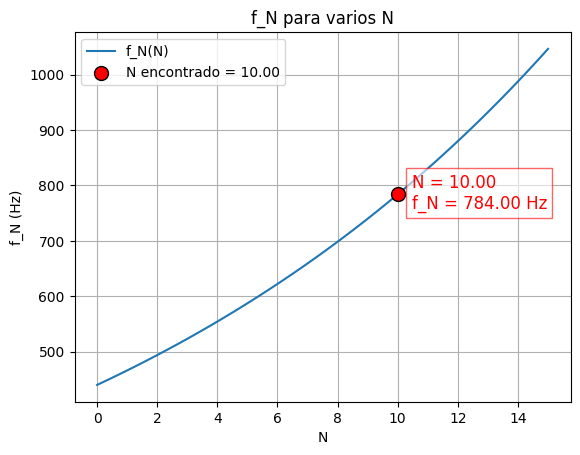

In [6]:
from scipy.optimize import newton

# Definimos la función f_N
f_N = lambda N: 440 * 2 ** (N / 12)

# Gráfica de f_N para varios N
N_vals = np.linspace(0, 15, 100)
plt.plot(N_vals, f_N(N_vals), label='f_N(N)')
plt.xlabel('N')
plt.ylabel('f_N (Hz)')
plt.title('f_N para varios N')
plt.legend()
plt.grid(True)

# ¿Para qué valor de N se cumple f_N = 784 Hz?
# Definimos la función que queremos encontrar, simplemente será f_N=784, es decir, f_N - 784 = 0
f_a_encontrar = lambda x: 440 * 2 ** (x / 12) - 784

# Usaremos el método de Newton para encontrar la raíz, es decir, para encontrar el N que cumple f(N) = 784 Hz
N_encontrado = newton(f_a_encontrar, x0=5, tol=1e-6)
print('N =', N_encontrado)
print('f_N =', f_N(N_encontrado))

# Texto del punto encontrado
plt.scatter(N_encontrado, f_N(N_encontrado), color='red', s=100, edgecolor='black', zorder=5, label=f'N encontrado = {N_encontrado:.2f}')
plt.annotate(f'N = {N_encontrado:.2f}\nf_N = {f_N(N_encontrado):.2f} Hz', 
             (N_encontrado, f_N(N_encontrado)), 
             textcoords="offset points", 
             xytext=(10,-10), 
             ha='left', 
             fontsize=12, 
             color='red', 
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='red'))

# Leyenda y mostrando gráfica
plt.legend()
plt.show()

Según el sitio web 'https://www.ciudadpentagrama.com/2020/01/tabla-frecuencias-notas-musicales.html', las frecuencias de las notas musicales están representadas e identificadas en la siguiente imagen:

<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgs4ia4Rd7FI71hw910jjOkROUdr9jSI57eebJ7q1CI9ib1p8WXOi9gvwtGYc_V-cDuALghLxkufDOqc2twadxB4S42259NsnxWIGBdnOxQz11iohkT0YIPphWLie47ADNzfhh3dvrt0AU/s1600/FRECUENCIA_NOTAS_MUSICALES.jpg" alt="Frecuencia Notas Musicales" width="600">

Además, sabemos que de la función $f_N =440 Hz \times 2^{\frac{N}{12}}$:
- 440 Hz es la frecuencia de referencia y corresponde a la nota La4 (A4) en la escala musical.
- N es un número de semitonos que desplaza hacia arriba o hacia abajo desde la nota de referencia (La4 a 440 Hz).
- El factor $2^{\frac{N}{12}}$ indica que hay 12 semitonos en una octava, por lo que una octava completa significa duplicar la frecuencia (multiplicar por 2).

Para ( N = 10 ), la fórmula de la frecuencia es:
$$f_{10} = 440 , \text{Hz} \times 2^{\frac{10}{12}} $$
Calculamos el valor:
$$ f_{10} = 440 \times 2^{\frac{10}{12}} \approx 440 \times 1.781797 $$
Realizando la multiplicación:
$$f_{10} \approx 440 \times 1.781797 \approx 783.99 , \text{Hz} $$

Por lo tanto, para ( N = 10 ), la frecuencia es aproximadamente 783.99 Hz. Esta corresponde a la nota Sol5 (G5) en la escala musical, que es precisamente el resultado computacional que obtuvimos, entonces se concluye que la nota musical que estamos analizando es **Sol en la octava 5**.

## Punto 4

En la señal de la grabación puede identificar que esta desaparece gradualmente. Este decaimiento en la amplitud se puede modelar con la ecuación $r(t)=r_0 \cdot e^{-t/τ}$. Realice un código para encontrar la amplitud de las oscilaciones1 $r’(t)={…}$ y ajuste $^2$ los valores de $r’(t)$ al modelo $r(t)$ con el fin de hallar los parámetros $r_0$ y τ. Superponga las gráficas de la grabación con la de $r’(t)$ y $r(t)$ y compruebe si el modelado del decaimiento es correcto.


$^2$ Para realizar el ajuste, puede linealizar el modelo aplicando logaritmo natural a ambos lados de la ecuación $r(t)=r_0 \cdot e^{-t/τ}$. De este modo se puede hacer un ajuste lineal en lugar de uno exponencial.


In [7]:
# Aqui su código

## Punto 5

Con base en los resultados del punto 2), construya la siguiente tabla:

| Frecuencia ($f_i$) | Amplitud ($A_i$) |
|:--------:|:--------:|
|Valor 1|Valor 2|

In [8]:
# Aqui su código

## Punto 6
Usando la tabla anterior, sintetice la señal del piano, usando la ecuación para $S(t)$ y cree un archivo de audio con ella o reprodúzcala en su tarjeta de sonido.


$$S(t)=r(t)\sum_i A_i \sin (2π ×f_i×t)$$

Compare ambas señales sintética y real y concluya sobre sus diferencias, tanto a nivel físico (comparando las gráficas en función del tiempo) como subjetivo (calidad o riqueza del sonido). ¿Las frecuencias que se excluyeron de $S(t)$ qué tanto afectan la calidad del sonido?



In [9]:
# Aqui su código

## Punto 7

Escriba sus conclusiones y aportes personales sobre este ejercicio. Además discuta sobre la importancia de la transformada de Fourier en el análisis de señales de auido

In [10]:
# Aqui su código